In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import bokeh.io
import bokeh.plotting


In [6]:
obs_data = pd.read_csv('observations.csv')
obs_data.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [9]:
obs_data['park_name'].replace(
    {'Great Smoky Mountains National Park' : 'Pegunungan Great Smoky', 
     'Bryce National Park' : 'Lembah Bryce', 
     'Yosemite National Park' : 'Pegunungan Yosemite', 
     'Yellow Stone National Park' : 'Pegunungan Yellow Stone'}, inplace=True
)
parks_list = obs_data.park_name.unique().tolist()
print(parks_list)

['Pegunungan Great Smoky', 'Pegunungan Yosemite', 'Lembah Bryce', 'Yellowstone National Park']


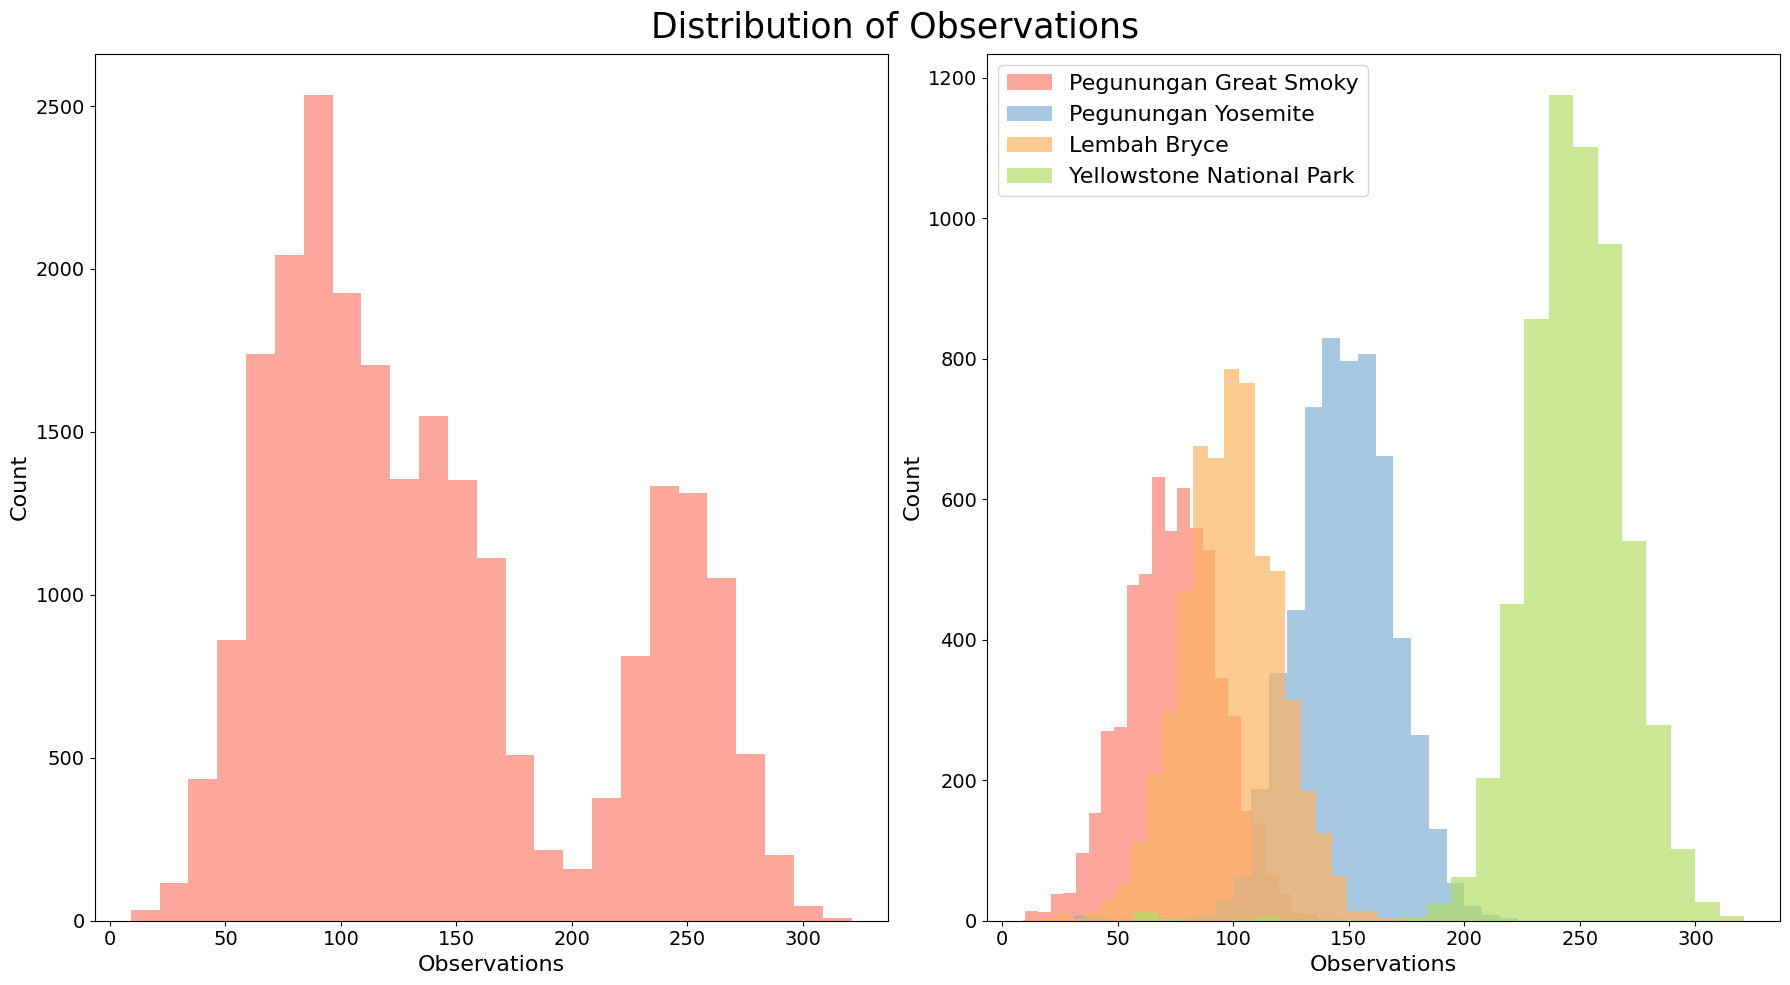

In [10]:
colours = ['#fb8072','#80b1d3','#fdb462','#b3de69']
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
plt.hist(x = obs_data.observations,
         bins = 25, color=colours[0], alpha=0.7)
plt.xlabel('Observations', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)

plt.subplot(1,2,2)
for i, park in enumerate(parks_list):
    hist_df = obs_data[obs_data.park_name == park]
    plt.hist(x = hist_df.observations,
            bins = 25, label = park, alpha=0.7, color=colours[i])
plt.xlabel('Observations', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 16)
plt.grid(False)

plt.suptitle("Distribution of Observations", fontsize = 25)
plt.tight_layout()
plt.show()

In [12]:
df_mean = obs_data.groupby('park_name')['observations'].mean().reset_index()
print(df_mean)

p = bokeh.plotting.figure(
    height=200,
    width=400,
    x_axis_label='observations',
    y_range=df_mean['park_name'].unique()[::-1],
    tools='pan,wheel_zoom,save,reset'
)

p.hbar(
    source=df_mean,
    y='park_name',
    right='observations',
    height=0.6
)

# Turn off gridlines on categorical axis
p.ygrid.grid_line_color = None

# Start axes at origin on quantitative axis
p.x_range.start = 0

bokeh.io.show(p)

                   park_name  observations
0               Lembah Bryce     98.905391
1     Pegunungan Great Smoky     74.144918
2        Pegunungan Yosemite    148.236951
3  Yellowstone National Park    247.864354
